
# > **`Data Preparation and Cleaning:`**



# **Importing Necessary libraries**

In [ ]:
import requests
import zipfile
import io
import os
import pandas as pd


# **Step 1: Download and Extract Dataset**

Download the dataset from GitHub

Extract the zip file into the 'data' directory for further processing



In [ ]:


# Step 1: Download the dataset from GitHub (adjust URL as needed)
url = 'https://github.com/SripathiVR/Car_Price_Prediction/raw/main/Car_Price%20Prediction.zip'
response = requests.get(url)

# Step 2: Extract the zip file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall('data')  # Extract all files into the 'data' folder

# Check the files inside the zip to confirm the dataset name
print("Files in the zip:", os.listdir('data'))


Files in the zip: ['Car_Price Prediction']


# **Step 2: Load and Verify Dataset**

Load the dataset from the extracted file path

Display the first few rows to verify the dataset has loaded correctly

In [ ]:

# Load the dataset (adjust file name based on what you see in the extracted folder)
file_path = 'data/Car_Price Prediction/car_dekho_cleaned_dataset_Raw.csv'  # Adjust if necessary
df = pd.read_csv(file_path)

# Check the first few rows of the data
print(df.head())

# Display basic info about the dataset
print("\nDataset Info:")
print(df.info())


   it      ft         bt        km transmission  ownerNo      oem  \
0   0  Petrol  Hatchback  120000.0       Manual        3   Maruti   
1   0  Petrol        SUV   32706.0       Manual        2     Ford   
2   0  Petrol  Hatchback   11949.0       Manual        1     Tata   
3   0  Petrol      Sedan   17794.0       Manual        1  Hyundai   
4   0  Diesel        SUV   60000.0       Manual        1   Maruti   

                model  modelYear  centralVariantId  ... data_2_list_10_key  \
0      Maruti Celerio       2015              3979  ...    No Door Numbers   
1       Ford Ecosport       2018              6087  ...       Cargo Volumn   
2          Tata Tiago       2018              2983  ...   Alloy Wheel Size   
3       Hyundai Xcent       2014              1867  ...   Alloy Wheel Size   
4  Maruti SX4 S Cross       2015              4277  ...   Alloy Wheel Size   

   data_2_list_10_value.1 data_2_list_11_key data_2_list_11_value.1  \
0                       5       Cargo Volumn 

<ipython-input-73-413f37fcf56c>:3: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


# **Step 3: Handle Missing Values**

Remove columns with more than 30% missing values

Fill missing values in numerical and categorical columns with the mean or mode


In [ ]:
# Remove columns with more than 30% missing values
missing_threshold = len(df) * 0.3  # 30% threshold for missing values
df_cleaned = df.dropna(thresh=missing_threshold, axis=1)

# Step 4.2: Fill missing values in categorical and numerical columns
for feature in df_cleaned.columns:
    if df_cleaned[feature].dtype == 'object':  # Categorical columns
        most_common_value = df_cleaned[feature].mode()[0]  # Mode (most frequent value)
        df_cleaned[feature].fillna(most_common_value, inplace=True)
    else:  # Numeric columns
        mean_value = df_cleaned[feature].mean()
        df_cleaned[feature].fillna(mean_value, inplace=True)

# Check if there are any remaining missing values
print("\nRemaining missing values:")
print(df_cleaned.isnull().sum())


<ipython-input-74-d1fdbf0326b2>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[feature].fillna(mean_value, inplace=True)
<ipython-input-74-d1fdbf0326b2>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try


Remaining missing values:
it               0
ft               0
bt               0
km               0
transmission     0
                ..
top_5_value.2    0
car_links        0
City             0
mileage          0
Seats            0
Length: 214, dtype: int64


In [ ]:
# Drop rows with any NaN values
df_cleaned = df_cleaned.dropna()

# Check if any NaN values remain
print(df_cleaned.isnull().sum())

it               0
ft               0
bt               0
km               0
transmission     0
                ..
top_5_value.2    0
car_links        0
City             0
mileage          0
Seats            0
Length: 214, dtype: int64


In [ ]:
# Drop rows with NaN values in specific columns ('age', 'salary')
df_cleaned = df_cleaned.dropna(subset=['ft', 'bt', 'model', 'transmission','oem' , 'variantName'])

# Check if any NaN values remain
print(df_cleaned.isnull().sum())

it               0
ft               0
bt               0
km               0
transmission     0
                ..
top_5_value.2    0
car_links        0
City             0
mileage          0
Seats            0
Length: 214, dtype: int64


# **Step 4: Remove Irrelevant Columns**

Drop columns that are irrelevant to car price prediction

Remove unnecessary features like image URLs, text descriptions, etc.


In [ ]:

# Load the dataset
df = pd.read_csv('data/Car_Price Prediction/car_dekho_cleaned_dataset_Raw.csv')  # Adjust path if needed

# Columns to drop (irrelevant columns for car price prediction)
irrelevant_columns = [
    'car_links', 'City', 'trendingText_imgUrl', 'trendingText_desc', 'trendingText_heading',
    'heading', 'top_0_key', 'top_0_value', 'top_0_icon', 'top_1_key', 'top_1_value', 'top_1_icon',
    'top_2_key', 'top_2_value', 'top_2_icon', 'top_3_key', 'top_3_value', 'top_3_icon', 'top_4_key',
    'top_4_value', 'top_4_icon', 'top_5_key', 'top_5_value', 'top_5_icon', 'top_6_key', 'top_6_value',
    'top_6_icon', 'top_7_key', 'top_7_value', 'top_7_icon', 'top_8_key', 'top_8_value', 'top_8_icon',
    'top_9_key', 'top_9_value', 'top_9_icon', 'heading.1', 'top_0_value.1', 'top_1_value.1',
    'top_2_value.1', 'top_3_value.1', 'top_4_value.1', 'top_5_value.1', 'top_6_value.1', 'top_7_value.1',
    'data_0_heading', 'data_0_subHeading', 'data_0_list_0_value', 'data_0_list_1_value', 'data_0_list_2_value',
    'data_0_list_3_value', 'data_0_list_4_value', 'data_0_list_5_value', 'data_0_list_6_value',
    'data_0_list_7_value', 'data_0_list_8_value', 'data_0_list_9_value', 'data_1_heading', 'data_1_subHeading',
    'data_1_list_0_value', 'data_1_list_1_value', 'data_1_list_2_value', 'data_1_list_3_value',
    'data_1_list_4_value', 'data_1_list_5_value', 'data_1_list_6_value', 'data_2_heading', 'data_2_subHeading',
    'data_2_list_0_value', 'data_2_list_1_value', 'data_2_list_2_value', 'data_2_list_3_value', 'data_2_list_4_value',
    'data_3_heading', 'data_3_subHeading', 'data_3_list_0_value', 'data_3_list_1_value', 'data_3_list_2_value',
    'data_3_list_3_value', 'data_3_list_4_value', 'data_3_list_5_value', 'data_3_list_6_value', 'data_3_list_7_value',
    'data_3_list_8_value', 'data_3_list_9_value', 'data_3_list_10_value', 'data_3_list_11_value', 'data_3_list_12_value',
    'commonIcon', 'top_8_value.1', 'data_0_list_10_value', 'data_0_list_11_value', 'data_0_list_12_value',
    'data_0_list_13_value', 'data_0_list_14_value', 'data_1_list_7_value', 'data_1_list_8_value', 'data_1_list_9_value',
    'data_1_list_10_value', 'data_2_list_5_value', 'data_2_list_6_value', 'data_2_list_7_value', 'data_2_list_8_value',
    'data_2_list_9_value', 'data_3_list_13_value', 'data_3_list_14_value', 'data_3_list_15_value', 'data_3_list_16_value',
    'data_3_list_17_value', 'data_3_list_18_value', 'data_3_list_19_value', 'data_3_list_20_value', 'data_3_list_21_value',
    'data_3_list_22_value', 'data_4_heading', 'data_4_subHeading', 'data_4_list_0_value', 'data_4_list_1_value',
    'data_4_list_2_value', 'data_4_list_3_value', 'data_4_list_4_value', 'data_4_list_5_value', 'data_4_list_6_value',
    'heading.2', 'top_0_key.1', 'top_1_key.1', 'top_1_value.2', 'top_2_key.1', 'top_2_value.2', 'top_3_key.1',
    'top_3_value.2', 'top_4_key.1', 'top_4_value.2', 'data_0_heading.1', 'data_0_subHeading.1', 'data_0_list_0_key',
    'data_0_list_0_value.1', 'data_0_list_1_key', 'data_0_list_1_value.1', 'data_0_list_2_key', 'data_0_list_2_value.1',
    'data_0_list_3_key', 'data_0_list_3_value.1', 'data_0_list_4_key', 'data_0_list_4_value.1', 'data_0_list_5_key',
    'data_0_list_5_value.1', 'data_0_list_6_key', 'data_0_list_6_value.1', 'data_0_list_7_key', 'data_0_list_7_value.1',
    'data_0_list_8_key', 'data_0_list_8_value.1', 'data_0_list_9_key', 'data_0_list_9_value.1', 'data_0_list_10_key',
    'data_0_list_10_value.1', 'data_1_heading.1', 'data_1_subHeading.1', 'data_1_list_0_key', 'data_1_list_0_value.1',
    'data_1_list_1_key', 'data_1_list_1_value.1', 'data_1_list_2_key', 'data_1_list_2_value.1', 'data_1_list_3_key',
    'data_1_list_3_value.1', 'data_1_list_4_key', 'data_1_list_4_value.1', 'data_1_list_5_key', 'data_1_list_5_value.1',
    'data_1_list_6_key', 'data_1_list_6_value.1', 'data_2_heading.1', 'data_2_subHeading.1', 'data_2_list_0_key',
    'data_2_list_0_value.1', 'data_2_list_1_key', 'data_2_list_1_value.1', 'data_2_list_2_key', 'data_2_list_2_value.1',
    'data_2_list_3_key', 'data_2_list_3_value.1', 'data_2_list_4_key', 'data_2_list_4_value.1', 'data_2_list_5_key',
    'data_2_list_5_value.1', 'data_2_list_6_key', 'data_2_list_6_value.1', 'data_2_list_7_key', 'data_2_list_7_value.1',
    'data_2_list_8_key', 'data_2_list_8_value.1', 'data_2_list_9_key', 'data_2_list_9_value.1', 'data_2_list_10_key',
    'data_2_list_10_value.1', 'data_2_list_11_key', 'data_2_list_11_value.1', 'top_5_key.1', 'top_5_value.2'
]

# Remove irrelevant columns
df_cleaned = df.drop(columns=irrelevant_columns, errors='ignore')

# Verify the cleaned dataset
print(df_cleaned.head())


   it      ft         bt        km transmission  ownerNo      oem  \
0   0  Petrol  Hatchback  120000.0       Manual        3   Maruti   
1   0  Petrol        SUV   32706.0       Manual        2     Ford   
2   0  Petrol  Hatchback   11949.0       Manual        1     Tata   
3   0  Petrol      Sedan   17794.0       Manual        1  Hyundai   
4   0  Diesel        SUV   60000.0       Manual        1   Maruti   

                model  modelYear  centralVariantId               variantName  \
0      Maruti Celerio       2015              3979                       VXI   
1       Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV   
2          Tata Tiago       2018              2983           1.2 Revotron XZ   
3       Hyundai Xcent       2014              1867        1.2 Kappa S Option   
4  Maruti SX4 S Cross       2015              4277             DDiS 200 Zeta   

      price  mileage  Seats  
0  400000.0    23.10    5.0  
1  811000.0    17.00    5.0  
2  585000.0   

<ipython-input-77-4a7784ca500e>:2: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Car_Price Prediction/car_dekho_cleaned_dataset_Raw.csv')  # Adjust path if needed


# **Step 5: Verify and Save the Cleaned Dataset**

Check the shape and first few rows of the cleaned data before saving
Save the cleaned dataset to Google Drive if it's not empty


In [ ]:
# Check the shape and the first few rows of df_cleaned before saving
print(f"Shape of df_cleaned: {df_cleaned.shape}")
print(f"First few rows of df_cleaned:\n{df_cleaned.head()}")

# If df_cleaned has rows, proceed with saving
if df_cleaned.shape[0] > 0:
    # Ensure the directory exists
    output_dir = '/content/drive/MyDrive'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the cleaned dataset
    df_cleaned.to_csv(output_dir + '/car_price_cleaned_data.csv', index=False)
    print("Data saved successfully!")
else:
    print("Dataframe is empty. Cannot save an empty file.")


Shape of df_cleaned: (7511, 14)
First few rows of df_cleaned:
   it      ft         bt        km transmission  ownerNo      oem  \
0   0  Petrol  Hatchback  120000.0       Manual        3   Maruti   
1   0  Petrol        SUV   32706.0       Manual        2     Ford   
2   0  Petrol  Hatchback   11949.0       Manual        1     Tata   
3   0  Petrol      Sedan   17794.0       Manual        1  Hyundai   
4   0  Diesel        SUV   60000.0       Manual        1   Maruti   

                model  modelYear  centralVariantId               variantName  \
0      Maruti Celerio       2015              3979                       VXI   
1       Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV   
2          Tata Tiago       2018              2983           1.2 Revotron XZ   
3       Hyundai Xcent       2014              1867        1.2 Kappa S Option   
4  Maruti SX4 S Cross       2015              4277             DDiS 200 Zeta   

      price  mileage  Seats  
0  400000.0 

# **Step 6: Save Cleaned Data to Google Drive**

Save the cleaned data to Google Drive for further use

Verify that the file was saved successfully by listing files in MyDrive

In [ ]:
# Save the cleaned data to Google Drive
df_cleaned.to_csv('/content/drive/MyDrive/car_price_cleaned_data.csv', index=False)

# Check if the file exists
print("Files in MyDrive:", os.listdir('/content/drive/MyDrive'))


Files in MyDrive: ['car_price_cleaned_data.csv']


In [ ]:
# Save the cleaned data to Google Drive
df_cleaned.to_csv('/content/drive/MyDrive/car_price_cleaned_data.csv', index=False)
print("Cleaned data saved to Google Drive.")


Cleaned data saved to Google Drive.


# **> Feature Selection:**

# **List Files in MyDrive**


List all files in 'MyDrive' to check if the cleaned data file exists

This helps verify that the file is available for loading in the notebook

In [ ]:
import os

# List the files in MyDrive to check if the cleaned data file exists
print(os.listdir('/content/drive/MyDrive'))


['car_price_cleaned_data.csv']


# Step 1: Load the Cleaned Data
Load the cleaned data from Google Drive
Display the first few rows to confirm the data is loaded correctly

In [ ]:
import pandas as pd

# Path to the cleaned dataset saved in MyDrive
file_path = '/content/drive/MyDrive/car_price_cleaned_data.csv'  # Adjust the path if necessary

# Load the cleaned data
cleaned_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to confirm it's loaded correctly
print("First few rows of the cleaned data:")
print(cleaned_data.head())


First few rows of the cleaned data:
   it      ft         bt        km transmission  ownerNo      oem  \
0   0  Petrol  Hatchback  120000.0       Manual        3   Maruti   
1   0  Petrol        SUV   32706.0       Manual        2     Ford   
2   0  Petrol  Hatchback   11949.0       Manual        1     Tata   
3   0  Petrol      Sedan   17794.0       Manual        1  Hyundai   
4   0  Diesel        SUV   60000.0       Manual        1   Maruti   

                model  modelYear  centralVariantId               variantName  \
0      Maruti Celerio       2015              3979                       VXI   
1       Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV   
2          Tata Tiago       2018              2983           1.2 Revotron XZ   
3       Hyundai Xcent       2014              1867        1.2 Kappa S Option   
4  Maruti SX4 S Cross       2015              4277             DDiS 200 Zeta   

      price  mileage  Seats  
0  400000.0    23.10    5.0  
1  81100

# Step 2: Label Encoding for Ordinal Features
Apply Label Encoding to the 'transmission' column (ordinal feature)

Convert 'Manual' and 'Automatic' into numerical values (0 and 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for 'transmission' (if this is an ordinal feature)
label_encoder = LabelEncoder()
cleaned_data['transmission'] = label_encoder.fit_transform(cleaned_data['transmission'])

# Check the first few rows to verify encoding
print(cleaned_data.head())


   it      ft         bt        km  transmission  ownerNo      oem  \
0   0  Petrol  Hatchback  120000.0             1        3   Maruti   
1   0  Petrol        SUV   32706.0             1        2     Ford   
2   0  Petrol  Hatchback   11949.0             1        1     Tata   
3   0  Petrol      Sedan   17794.0             1        1  Hyundai   
4   0  Diesel        SUV   60000.0             1        1   Maruti   

                model  modelYear  centralVariantId               variantName  \
0      Maruti Celerio       2015              3979                       VXI   
1       Ford Ecosport       2018              6087  1.5 Petrol Titanium BSIV   
2          Tata Tiago       2018              2983           1.2 Revotron XZ   
3       Hyundai Xcent       2014              1867        1.2 Kappa S Option   
4  Maruti SX4 S Cross       2015              4277             DDiS 200 Zeta   

      price  mileage  Seats  
0  400000.0    23.10    5.0  
1  811000.0    17.00    5.0  
2  58500

# Step 3: One-Hot Encoding for Categorical Features
Apply One-Hot Encoding to the 'ft' (fuel type) column

Convert categorical values like 'Petrol', 'Diesel' into binary columns

In [ ]:

# Apply One-Hot Encoding for 'ft' (fuel type)
cleaned_data = pd.get_dummies(cleaned_data, columns=['oem', 'variantName','model','ft', 'bt'], drop_first=True)

# Verify the encoding
print(cleaned_data.head())


   it        km  transmission  ownerNo  modelYear  centralVariantId     price  \
0   0  120000.0             1        3       2015              3979  400000.0   
1   0   32706.0             1        2       2018              6087  811000.0   
2   0   11949.0             1        1       2018              2983  585000.0   
3   0   17794.0             1        1       2014              1867  462000.0   
4   0   60000.0             1        1       2015              4277  790000.0   

   mileage  Seats  oem_BMW  ...  ft_Lpg  ft_Petrol  bt_Coupe  bt_Hatchback  \
0    23.10    5.0    False  ...   False       True     False          True   
1    17.00    5.0    False  ...   False       True     False         False   
2    23.84    5.0    False  ...   False       True     False          True   
3    19.10    5.0    False  ...   False       True     False         False   
4    23.65    5.0    False  ...   False      False     False         False   

   bt_MUV  bt_Minivans  bt_Pickup Trucks  bt

# Step 4: Normalize Numerical Features
Normalize the numerical columns using StandardScaler

Standardize features like 'mileage', 'modelYear' to the same scale

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Step 4: Normalize the numerical features
scaler = StandardScaler()
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
cleaned_data[numeric_columns] = scaler.fit_transform(cleaned_data[numeric_columns])

# Verify the cleaned and encoded dataset
print(cleaned_data.head())

    it        km  transmission   ownerNo  modelYear  centralVariantId  \
0  0.0  1.353025      0.510754  2.470650  -0.310328         -0.324470   
1  0.0 -0.621144      0.510754  0.946582   0.449987          0.451746   
2  0.0 -1.090567      0.510754 -0.577486   0.449987         -0.691221   
3  0.0 -0.958381      0.510754 -0.577486  -0.563766         -1.102159   
4  0.0 -0.003885      0.510754 -0.577486  -0.310328         -0.214740   

      price   mileage     Seats  oem_BMW  ...  ft_Lpg  ft_Petrol  bt_Coupe  \
0 -0.636090  1.000586 -0.277937    False  ...   False       True     False   
1  0.508610 -0.749112 -0.277937    False  ...   False       True     False   
2 -0.120836  1.212844 -0.277937    False  ...   False       True     False   
3 -0.463411 -0.146757 -0.277937    False  ...   False       True     False   
4  0.450122  1.158345 -0.277937    False  ...   False      False     False   

   bt_Hatchback  bt_MUV  bt_Minivans  bt_Pickup Trucks  bt_SUV  bt_Sedan  \
0          True 

# Step 5: Visualize Feature Distributions
Visualize the distribution of numerical features using histograms

Use Kernel Density Estimation (KDE) to visualize the smooth density of features

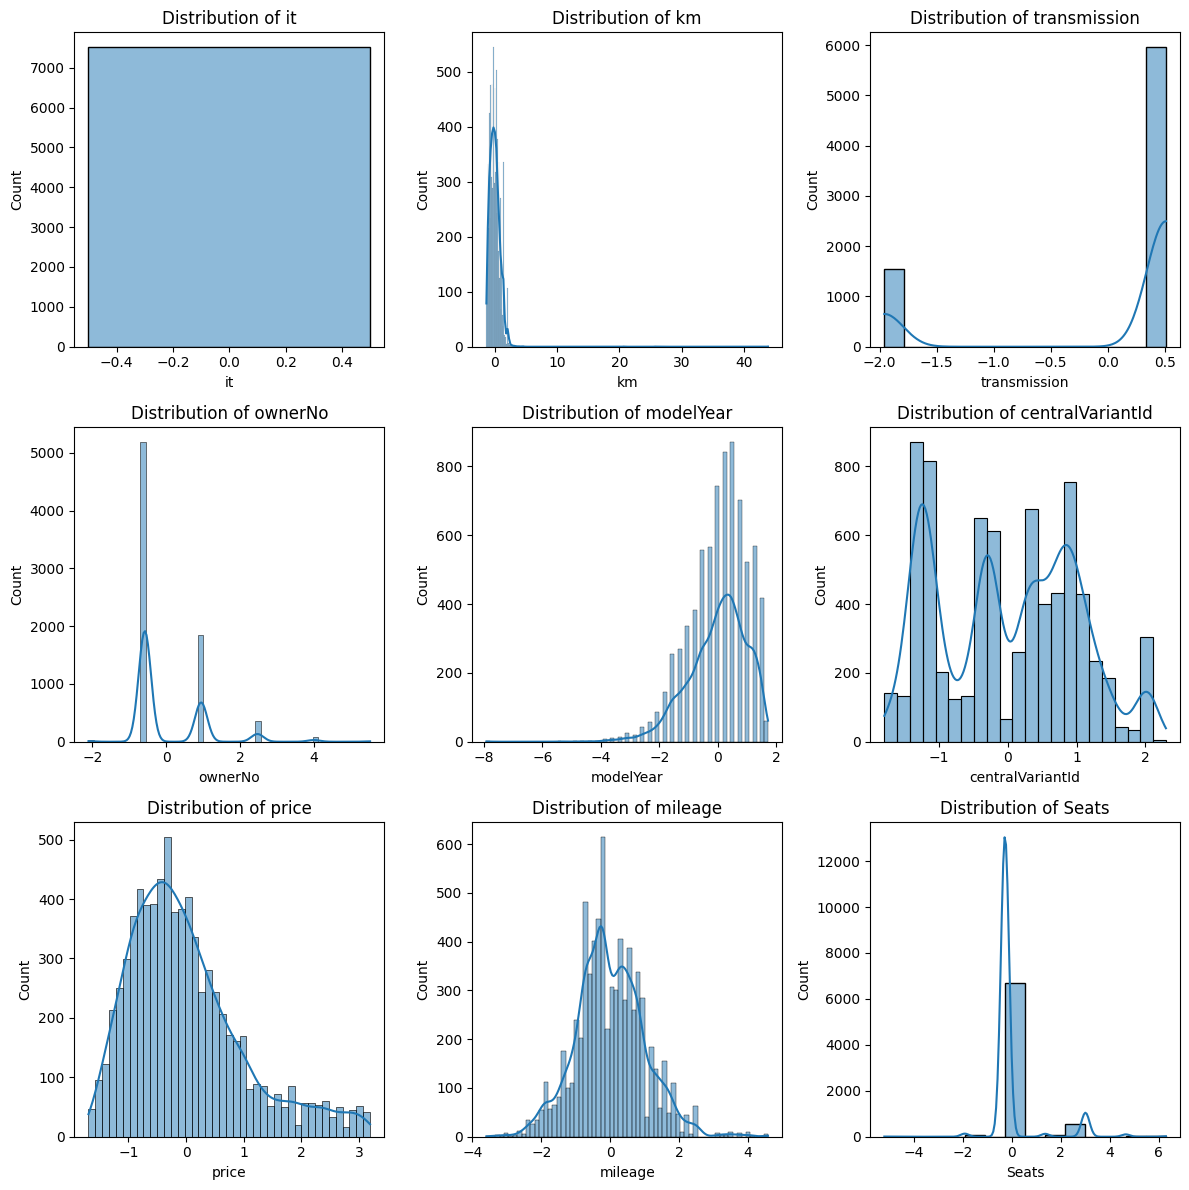

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Identify numerical features
numerical_features = cleaned_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows and columns for the grid
num_features = len(numerical_features)
num_columns = 3  # Fixed number of columns for better visualization
num_rows = int(np.ceil(num_features / num_columns))  # Round up the number of rows

# Create histograms for each numerical feature
plt.figure(figsize=(12, 4 * num_rows))  # Adjust figure size based on the number of rows
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(cleaned_data[feature], kde=True)  # KDE for smooth density curve
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


# Step 6: Calculate and Visualize Correlations
Calculate the correlation matrix to see how features relate to 'price'

Visualize the correlations with a heatmap for easy interpretation


Correlation with price:
price               1.000000
modelYear           0.548097
centralVariantId    0.344760
Seats               0.173587
km                 -0.169702
ownerNo            -0.223054
mileage            -0.273925
transmission       -0.369404
it                       NaN
Name: price, dtype: float64


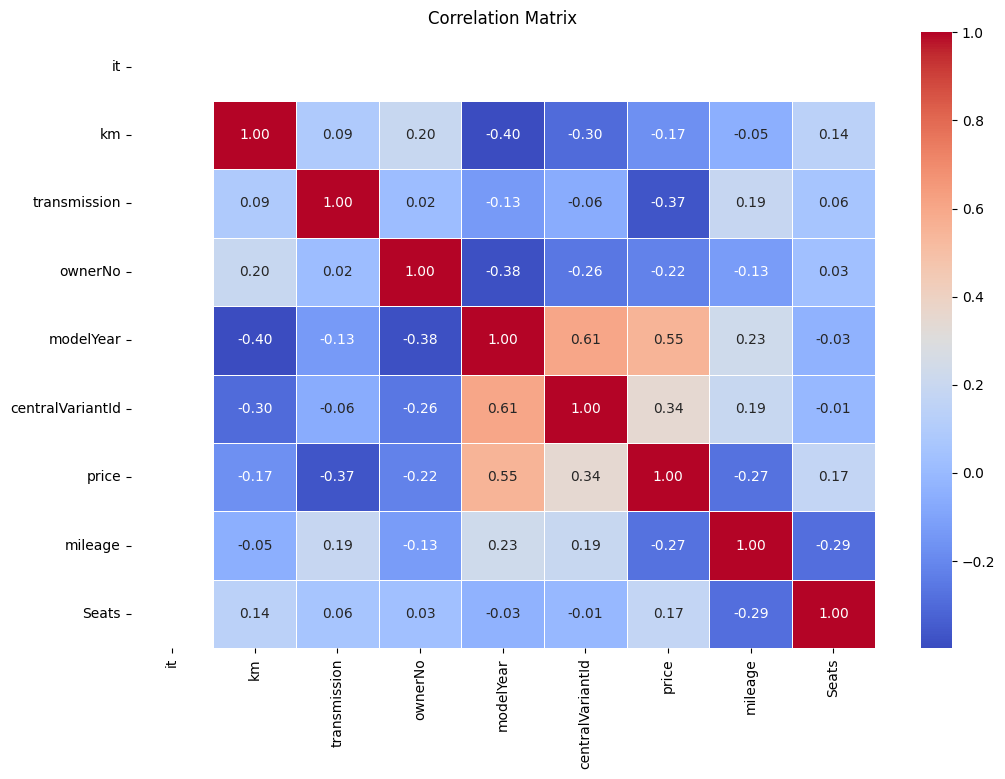

In [ ]:
# Select only numerical features
numerical_features = cleaned_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for only numerical features
correlation_matrix = cleaned_data[numerical_features].corr()

# Display the correlation with the target variable 'price'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("\nCorrelation with price:")
print(correlation_with_price)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Step 7: Visualize Relationships Between Features and Price
Visualize the relationship between the top correlated features and price

Use scatter plots for continuous features and box plots for categorical features

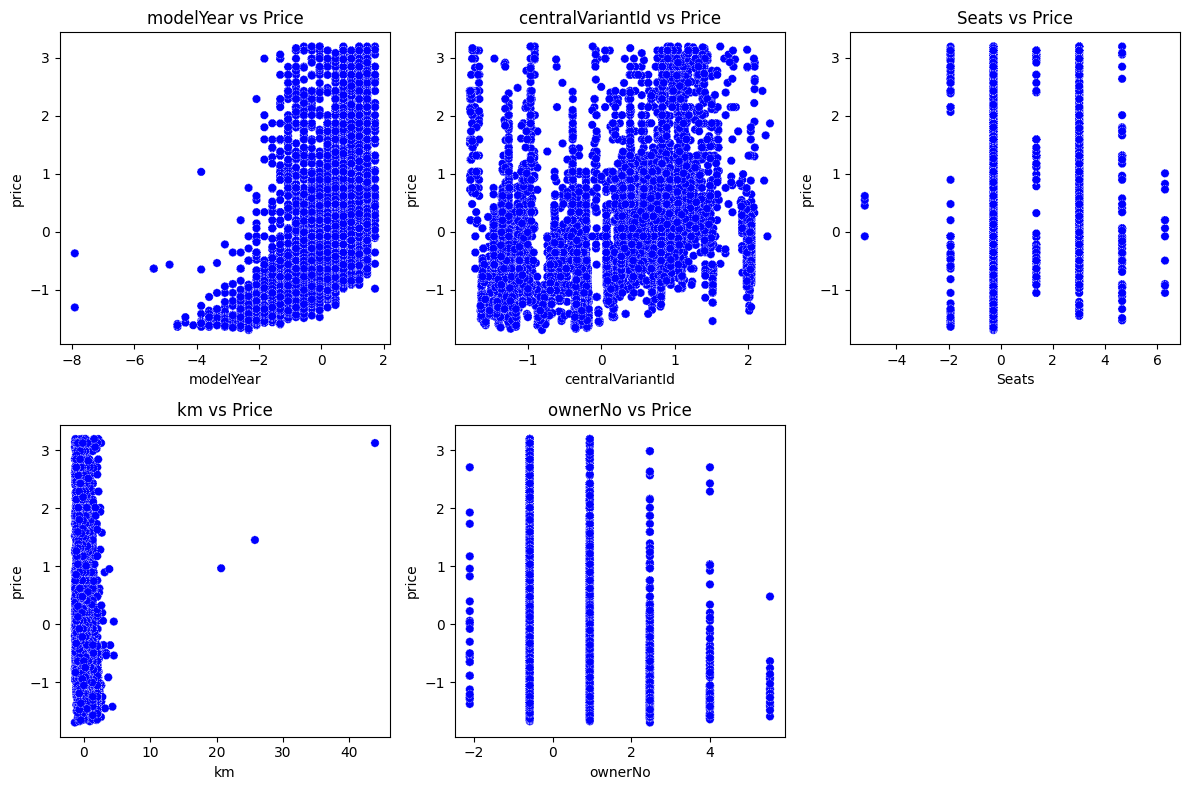

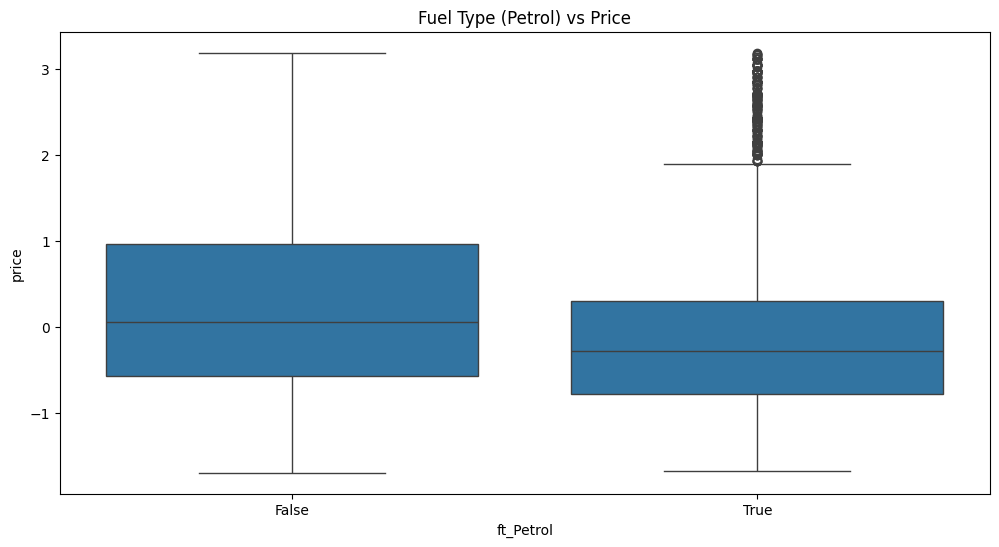

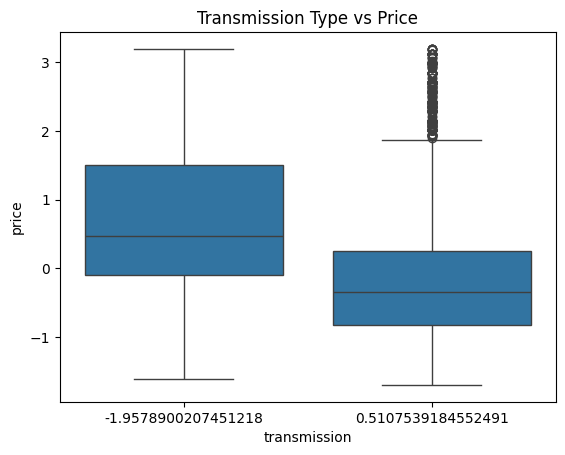

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top correlated features (excluding 'price')
top_features = correlation_with_price.index[1:6]  # Top 5 most correlated features (excluding 'price')

# Visualize the relationship with dotted scatter lines
plt.figure(figsize=(12, 8))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=cleaned_data[feature], y=cleaned_data['price'], linestyle=':', color='b')  # Dotted line style
    plt.title(f'{feature} vs Price')

plt.tight_layout()
plt.show()

# Boxplots for categorical features (use the correct one-hot encoded column name if 'ft' is replaced)
plt.figure(figsize=(12, 6))

# Boxplot for 'fuel type' vs price
sns.boxplot(x=cleaned_data['ft_Petrol'], y=cleaned_data['price'])  # Adjusted to correct column name
plt.title('Fuel Type (Petrol) vs Price')
plt.show()

# Boxplot for 'transmission' vs price (ensure 'transmission' is correctly encoded)
sns.boxplot(x=cleaned_data['transmission'], y=cleaned_data['price'])
plt.title('Transmission Type vs Price')
plt.show()
